<a href="https://www.kaggle.com/code/tamaraabuhawele/mobilenet-using-keras-sign-language?scriptVersionId=117897880" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# **Sign Language**

# Importing Libraries

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten
from tensorflow.keras.optimizers import RMSprop,Adam ,Nadam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers.experimental.preprocessing import Rescaling
from tensorflow.keras.metrics import categorical_crossentropy
from sklearn.metrics import confusion_matrix
from tensorflow.keras.models import Model
import pandas as pd
import itertools
import shutil
import glob
import random
import matplotlib.pyplot as plt
import numpy as np
import os
import zipfile
from PIL import Image




# Importing Data

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/how-to-convert-csv-to-images/make_imgs.py
/kaggle/input/sign-language-mnist/sign_mnist_test.csv
/kaggle/input/sign-language-mnist/amer_sign2.png
/kaggle/input/sign-language-mnist/amer_sign3.png
/kaggle/input/sign-language-mnist/sign_mnist_train.csv
/kaggle/input/sign-language-mnist/american_sign_language.PNG
/kaggle/input/sign-language-mnist/sign_mnist_test/sign_mnist_test.csv
/kaggle/input/sign-language-mnist/sign_mnist_train/sign_mnist_train.csv





# Data Analyses and Understanding

In [3]:
train = pd.read_csv("../input/sign-language-mnist/sign_mnist_train/sign_mnist_train.csv")

In [4]:
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [5]:
test = pd.read_csv("../input/sign-language-mnist/sign_mnist_test/sign_mnist_test.csv")

In [6]:
train.shape

(27455, 785)

In [7]:
test.shape

(7172, 785)

In [8]:
print(sorted(train.label.unique()))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]


<a id ="super3"></a> 

# Data Preperation

24 classes


 

# Create Samples(train ,test ,validation)

In [9]:
train_sample = train.loc[:499,:]
train_sample.shape

(500, 785)

In [10]:
train_sample.head

<bound method NDFrame.head of      label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0        3     107     118     127     134     139     143     146     150   
1        6     155     157     156     156     156     157     156     158   
2        2     187     188     188     187     187     186     187     188   
3        2     211     211     212     212     211     210     211     210   
4       13     164     167     170     172     176     179     180     184   
..     ...     ...     ...     ...     ...     ...     ...     ...     ...   
495     17     161     164     167     171     174     177     178     179   
496     15     148     149     150     151     151     152     153     153   
497     19     173     175     177     179     180     181     181     180   
498     20     121     125     129     132     134     137     139     141   
499     11     156     159     163     164     165     167     169     170   

     pixel9  ...  pixel775  pixel

In [11]:
valid_sample = train.iloc[-200:,:]
valid_sample.shape

(200, 785)

In [12]:
test_sample = test.loc[:199,:]
test_sample.shape

(200, 785)

# Dataframes to CSV


In [13]:
train_sample.to_csv("train_sample.csv",index=False)

In [14]:
test_sample.to_csv("test_sample.csv",index=False)

In [15]:
valid_sample.to_csv("valid_sample.csv",index=False)

 

# CSV to Images

In [16]:
!python ../input/how-to-convert-csv-to-images/make_imgs.py --label label ./test_sample.csv ./mnist-imgs/sample/test/ 

In [17]:
!python ../input/how-to-convert-csv-to-images/make_imgs.py --label label ./train_sample.csv ./mnist-imgs/sample/train/ 

In [18]:
!python ../input/how-to-convert-csv-to-images/make_imgs.py --label label ./valid_sample.csv mnist-imgs/sample/valid/


 

# Indicate the path

In [19]:
train_path = "./mnist-imgs/sample/train"
test_path = "./mnist-imgs/sample/test"
valid_path = "./mnist-imgs/sample/valid"

# preprossing data to match mobilenet input shape

Note: each Keras Application expects a specific kind of input preprocessing. For MobileNet, call tf.keras.applications.mobilenet.preprocess_input on your inputs before passing them to the model. mobilenet.preprocess_input will scale input pixels between -1 and 1


mobilent accept 224,224 shape

In [20]:
train_btch = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory=train_path, target_size=(224,224), batch_size=10)

valid_btch = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory=valid_path, target_size=(224,224), batch_size=10)

test_btch = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory=test_path, target_size=(224,224), batch_size=10, shuffle=False)

Found 500 images belonging to 24 classes.
Found 200 images belonging to 24 classes.
Found 200 images belonging to 24 classes.


In [21]:
train_btch

In [22]:
def show_image(img, title=None):
    plt.imshow(img)
    plt.title(title)
    plt.axis('off')

<a id ="super6"></a> 

# CREATE THE MODEL

# Loading mobilenet model

In [23]:
mobil = tf.keras.applications.mobilenet.MobileNet()

17227776/17225924 [==============================] - 0s 0us/step


In [24]:
mobil.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32

we have 24 classes for sign language,then the number of neurons in output layer is 24


we will enclude the last 6 layers output in our output model

In [25]:
take = mobil.layers[-6].output
drop = tf.keras.layers.Dropout(0.2)(take)
output = Dense(units=24,activation="softmax")(drop)

In [26]:
model = Model(inputs=mobil.input, outputs= output)


# Before Freezing

In [27]:
len(model.trainable_variables)

83

In [28]:
len(model.non_trainable_variables)

54

In [29]:
#FREEZING
for layer in model.layers[:-23]:
    layer.trainable =False 


# After Freezing

In [30]:
len(model.trainable_variables)

20

In [31]:
len(model.non_trainable_variables)

117

In [32]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32)      0     



# First ,compiling with low learning rate

In [33]:
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-4,
    decay_steps=10000,
    decay_rate=0.9)
optimizer = keras.optimizers.Adam(learning_rate=lr_schedule)

In [34]:
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Unfreeze then Recompile with higher learning rate

In [35]:
for layer in model.layers[:-23]:
    layer.trainable =True

In [36]:
model.compile(optimizer=keras.optimizers.SGD(lr=0.1), loss='categorical_crossentropy', metrics=['accuracy'])

Fitting

In [37]:
model.fit(x=train_btch,validation_data=valid_btch,epochs=20,verbose=2)

Epoch 1/20
50/50 - 12s - loss: 2.9493 - accuracy: 0.4220 - val_loss: 3.6698 - val_accuracy: 0.2950
Epoch 2/20
50/50 - 3s - loss: 0.5412 - accuracy: 0.8280 - val_loss: 0.9800 - val_accuracy: 0.6750
Epoch 3/20
50/50 - 3s - loss: 0.2252 - accuracy: 0.9380 - val_loss: 0.7567 - val_accuracy: 0.8350
Epoch 4/20
50/50 - 3s - loss: 0.1329 - accuracy: 0.9620 - val_loss: 1.4977 - val_accuracy: 0.7150
Epoch 5/20
50/50 - 3s - loss: 0.0642 - accuracy: 0.9740 - val_loss: 0.5915 - val_accuracy: 0.8450
Epoch 6/20
50/50 - 3s - loss: 0.0257 - accuracy: 0.9940 - val_loss: 0.3097 - val_accuracy: 0.9150
Epoch 7/20
50/50 - 3s - loss: 0.0061 - accuracy: 1.0000 - val_loss: 0.1691 - val_accuracy: 0.9500
Epoch 8/20
50/50 - 3s - loss: 0.0163 - accuracy: 0.9920 - val_loss: 0.1521 - val_accuracy: 0.9550
Epoch 9/20
50/50 - 3s - loss: 0.0076 - accuracy: 1.0000 - val_loss: 0.1505 - val_accuracy: 0.9550
Epoch 10/20
50/50 - 3s - loss: 0.0031 - accuracy: 1.0000 - val_loss: 0.1419 - val_accuracy: 0.9600
Epoch 11/20
50/50 

train_accuracy: 1.0000 


val_accuracy: 0.9950



# Prediction & Result

In [38]:
test_label = test_btch.classes

In [39]:
prediction = model.predict(x=test_btch, verbose=2)

20/20 - 1s


In [40]:
cm=confusion_matrix(y_true=test_label, y_pred=prediction.argmax(axis=1))

In [41]:
test_btch.class_indices

{'0': 0,
 '1': 1,
 '10': 2,
 '11': 3,
 '12': 4,
 '13': 5,
 '14': 6,
 '15': 7,
 '16': 8,
 '17': 9,
 '18': 10,
 '19': 11,
 '2': 12,
 '20': 13,
 '21': 14,
 '22': 15,
 '23': 16,
 '24': 17,
 '3': 18,
 '4': 19,
 '5': 20,
 '6': 21,
 '7': 22,
 '8': 23}

In [42]:
cm_label=[str(x) for x in range(24 + 1)]
print(cm_label)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24']


In [43]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues,width=10,height=10):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize=(width,height))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

    
    
#It is directly from the documents.

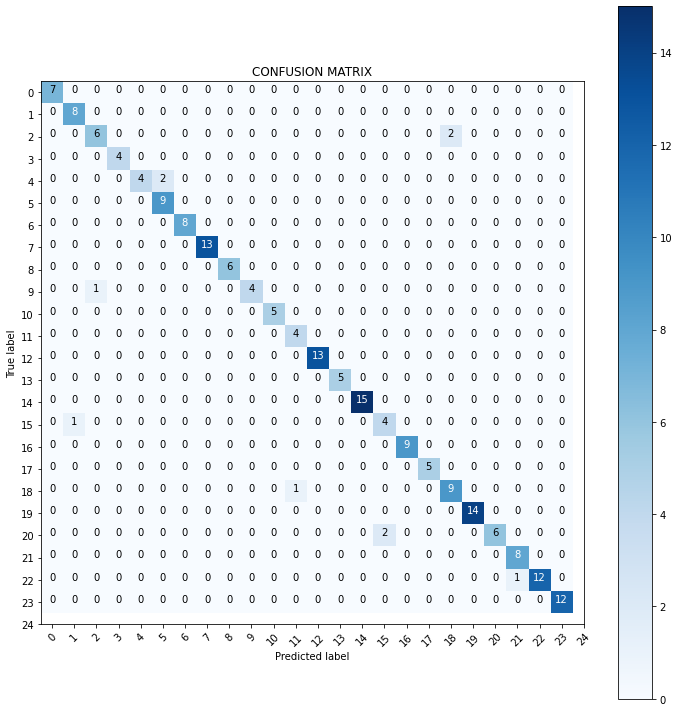

In [44]:

plot_confusion_matrix(cm=cm,classes=cm_label, title ="CONFUSION MATRIX")


In [45]:
from sklearn.metrics import confusion_matrix

classes=cm_label
y_true=test_label
y_pred=prediction.argmax(axis=1)

confusion = confusion_matrix(y_true, y_pred)
#print('Confusion Matrix\n')
#importing accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_true, y_pred)))

print('Micro Precision: {:.2f}'.format(precision_score(y_true, y_pred, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(y_true, y_pred, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(y_true, y_pred, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(y_true, y_pred, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(y_true, y_pred, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(y_true, y_pred, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(y_true, y_pred, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_true, y_pred, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_true, y_pred, average='weighted')))



Accuracy: 0.95

Micro Precision: 0.95
Micro Recall: 0.95
Micro F1-score: 0.95

Macro Precision: 0.95
Macro Recall: 0.94
Macro F1-score: 0.94

Weighted Precision: 0.96
Weighted Recall: 0.95
Weighted F1-score: 0.95


 Feel free to contact me if you have a question comment ,advice or recommendation.


Please ,let me know if I made a mistake